# 물류의 최적경로를 컨설팅하는 테크닉

In [2]:
import pandas as pd
factories = pd.read_csv("./pyda100-master/6장/tbl_factory.csv", index_col=0)
factories

,FCName,FCDemand,FCRegion
FCID,,,
FC00001,서울공장,28,북부
FC00002,수원공장,29,북부
FC00003,인천공장,31,북부
FC00004,대전공장,25,북부
FC00005,대구공장,21,남부
FC00006,광주공장,30,남부
FC00007,부산공장,25,남부
FC00008,울산공장,16,남부


In [3]:
warehouses = pd.read_csv("./pyda100-master/6장/tbl_warehouse.csv")
warehouses

,WHID,WHName,WHSupply,WHRegion
0,WH00001,판교창고,35,북부
1,WH00002,용인창고,41,북부
2,WH00003,수원창고,42,북부
3,WH00004,대전창고,60,남부
4,WH00005,대구창고,72,남부
5,WH00006,광주창고,65,남부


In [5]:
cost = pd.read_csv("./pyda100-master/6장/rel_cost.csv", index_col=0)
cost

,FCID,WHID,Cost
RCostID,,,
1,FC00001,WH00001,0.4
2,FC00001,WH00002,0.8
3,FC00001,WH00003,1.5
4,FC00002,WH00001,0.9
5,FC00002,WH00002,0.8
6,FC00002,WH00003,1.6
7,FC00003,WH00001,1.2
8,FC00003,WH00002,1.3
9,FC00003,WH00003,1.5


In [6]:
trans = pd.read_csv("./pyda100-master/6장/tbl_transaction.csv", index_col=0)
trans

,TransactionDate,ToFC,FromWH,Quantity
TRID,,,,
0,2019-01-01 02:11:10,FC00004,WH00003,33
1,2019-01-01 06:12:42,FC00007,WH00006,19
2,2019-01-01 06:32:32,FC00006,WH00004,31
3,2019-01-01 07:17:06,FC00002,WH00003,18
4,2019-01-01 07:52:18,FC00001,WH00002,30
...,...,...,...,...
3995,2019-12-31 11:27:51,FC00007,WH00006,29
3996,2019-12-31 17:10:21,FC00002,WH00003,35
3997,2019-12-31 19:35:07,FC00003,WH00001,36


In [7]:
join_data = pd.merge(trans, cost, how='left', left_on=['ToFC', 'FromWH'], right_on = ['FCID', 'WHID'])
join_data

,TransactionDate,ToFC,FromWH,Quantity,FCID,WHID,Cost
0,2019-01-01 02:11:10,FC00004,WH00003,33,FC00004,WH00003,1.1
1,2019-01-01 06:12:42,FC00007,WH00006,19,FC00007,WH00006,1.3
2,2019-01-01 06:32:32,FC00006,WH00004,31,FC00006,WH00004,0.9
3,2019-01-01 07:17:06,FC00002,WH00003,18,FC00002,WH00003,1.6
4,2019-01-01 07:52:18,FC00001,WH00002,30,FC00001,WH00002,0.8
...,...,...,...,...,...,...,...
3995,2019-12-31 11:27:51,FC00007,WH00006,29,FC00007,WH00006,1.3
3996,2019-12-31 17:10:21,FC00002,WH00003,35,FC00002,WH00003,1.6
3997,2019-12-31 19:35:07,FC00003,WH00001,36,FC00003,WH00001,1.2
3998,2019-12-31 21:45:07,FC00005,WH00005,34,FC00005,WH00005,0.3


In [8]:
join_data = pd.merge(join_data, factories, left_on='ToFC', right_on='FCID', how='left')
join_data

,TransactionDate,ToFC,FromWH,Quantity,FCID,WHID,Cost,FCName,FCDemand,FCRegion
0,2019-01-01 02:11:10,FC00004,WH00003,33,FC00004,WH00003,1.1,대전공장,25,북부
1,2019-01-01 06:12:42,FC00007,WH00006,19,FC00007,WH00006,1.3,부산공장,25,남부
2,2019-01-01 06:32:32,FC00006,WH00004,31,FC00006,WH00004,0.9,광주공장,30,남부
3,2019-01-01 07:17:06,FC00002,WH00003,18,FC00002,WH00003,1.6,수원공장,29,북부
4,2019-01-01 07:52:18,FC00001,WH00002,30,FC00001,WH00002,0.8,서울공장,28,북부
...,...,...,...,...,...,...,...,...,...,...
3995,2019-12-31 11:27:51,FC00007,WH00006,29,FC00007,WH00006,1.3,부산공장,25,남부
3996,2019-12-31 17:10:21,FC00002,WH00003,35,FC00002,WH00003,1.6,수원공장,29,북부
3997,2019-12-31 19:35:07,FC00003,WH00001,36,FC00003,WH00001,1.2,인천공장,31,북부
3998,2019-12-31 21:45:07,FC00005,WH00005,34,FC00005,WH00005,0.3,대구공장,21,남부


In [10]:
join_data = pd.merge(join_data, warehouses, left_on='FromWH', right_on = 'WHID', how='left')
join_data

,TransactionDate,ToFC,FromWH,Quantity,FCID,WHID_x,Cost,FCName,FCDemand,FCRegion,WHID_y,WHName,WHSupply,WHRegion
0,2019-01-01 02:11:10,FC00004,WH00003,33,FC00004,WH00003,1.1,대전공장,25,북부,WH00003,수원창고,42,북부
1,2019-01-01 06:12:42,FC00007,WH00006,19,FC00007,WH00006,1.3,부산공장,25,남부,WH00006,광주창고,65,남부
2,2019-01-01 06:32:32,FC00006,WH00004,31,FC00006,WH00004,0.9,광주공장,30,남부,WH00004,대전창고,60,남부
3,2019-01-01 07:17:06,FC00002,WH00003,18,FC00002,WH00003,1.6,수원공장,29,북부,WH00003,수원창고,42,북부
4,2019-01-01 07:52:18,FC00001,WH00002,30,FC00001,WH00002,0.8,서울공장,28,북부,WH00002,용인창고,41,북부
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3995,2019-12-31 11:27:51,FC00007,WH00006,29,FC00007,WH00006,1.3,부산공장,25,남부,WH00006,광주창고,65,남부
3996,2019-12-31 17:10:21,FC00002,WH00003,35,FC00002,WH00003,1.6,수원공장,29,북부,WH00003,수원창고,42,북부
3997,2019-12-31 19:35:07,FC00003,WH00001,36,FC00003,WH00001,1.2,인천공장,31,북부,WH00001,판교창고,35,북부
3998,2019-12-31 21:45:07,FC00005,WH00005,34,FC00005,WH00005,0.3,대구공장,21,남부,WH00005,대구창고,72,남부


In [11]:
join_data = join_data[['TransactionDate', 'Quantity', 'Cost', 'ToFC', 'FCName', 'FCDemand', 'FromWH', 'WHName', "WHSupply", "WHRegion"]]
join_data

,TransactionDate,Quantity,Cost,ToFC,FCName,FCDemand,FromWH,WHName,WHSupply,WHRegion
0,2019-01-01 02:11:10,33,1.1,FC00004,대전공장,25,WH00003,수원창고,42,북부
1,2019-01-01 06:12:42,19,1.3,FC00007,부산공장,25,WH00006,광주창고,65,남부
2,2019-01-01 06:32:32,31,0.9,FC00006,광주공장,30,WH00004,대전창고,60,남부
3,2019-01-01 07:17:06,18,1.6,FC00002,수원공장,29,WH00003,수원창고,42,북부
4,2019-01-01 07:52:18,30,0.8,FC00001,서울공장,28,WH00002,용인창고,41,북부
...,...,...,...,...,...,...,...,...,...,...
3995,2019-12-31 11:27:51,29,1.3,FC00007,부산공장,25,WH00006,광주창고,65,남부
3996,2019-12-31 17:10:21,35,1.6,FC00002,수원공장,29,WH00003,수원창고,42,북부
3997,2019-12-31 19:35:07,36,1.2,FC00003,인천공장,31,WH00001,판교창고,35,북부
3998,2019-12-31 21:45:07,34,0.3,FC00005,대구공장,21,WH00005,대구창고,72,남부


In [12]:
north = join_data.loc[join_data['WHRegion'] == '북부']
north

,TransactionDate,Quantity,Cost,ToFC,FCName,FCDemand,FromWH,WHName,WHSupply,WHRegion
0,2019-01-01 02:11:10,33,1.1,FC00004,대전공장,25,WH00003,수원창고,42,북부
3,2019-01-01 07:17:06,18,1.6,FC00002,수원공장,29,WH00003,수원창고,42,북부
4,2019-01-01 07:52:18,30,0.8,FC00001,서울공장,28,WH00002,용인창고,41,북부
7,2019-01-01 09:09:30,12,1.5,FC00001,서울공장,28,WH00003,수원창고,42,북부
8,2019-01-01 10:52:55,27,1.5,FC00003,인천공장,31,WH00003,수원창고,42,북부
...,...,...,...,...,...,...,...,...,...,...
3984,2019-12-30 12:29:42,22,0.9,FC00002,수원공장,29,WH00001,판교창고,35,북부
3987,2019-12-30 17:51:24,32,1.3,FC00003,인천공장,31,WH00002,용인창고,41,북부
3992,2019-12-31 01:50:16,33,0.8,FC00001,서울공장,28,WH00002,용인창고,41,북부
3996,2019-12-31 17:10:21,35,1.6,FC00002,수원공장,29,WH00003,수원창고,42,북부


In [13]:
south = join_data.loc[join_data['WHRegion'] == '남부']
south

,TransactionDate,Quantity,Cost,ToFC,FCName,FCDemand,FromWH,WHName,WHSupply,WHRegion
1,2019-01-01 06:12:42,19,1.3,FC00007,부산공장,25,WH00006,광주창고,65,남부
2,2019-01-01 06:32:32,31,0.9,FC00006,광주공장,30,WH00004,대전창고,60,남부
5,2019-01-01 08:56:09,31,0.3,FC00005,대구공장,21,WH00005,대구창고,72,남부
6,2019-01-01 09:00:15,33,0.7,FC00006,광주공장,30,WH00006,광주창고,65,남부
9,2019-01-01 14:12:51,21,0.7,FC00006,광주공장,30,WH00006,광주창고,65,남부
...,...,...,...,...,...,...,...,...,...,...
3993,2019-12-31 03:35:04,20,0.7,FC00006,광주공장,30,WH00006,광주창고,65,남부
3994,2019-12-31 07:05:56,11,0.8,FC00005,대구공장,21,WH00004,대전창고,60,남부
3995,2019-12-31 11:27:51,29,1.3,FC00007,부산공장,25,WH00006,광주창고,65,남부
3998,2019-12-31 21:45:07,34,0.3,FC00005,대구공장,21,WH00005,대구창고,72,남부


In [14]:
print("북부지사 총 비용: ", str(north["Cost"].sum()) + "만원")
print("남부지사 총 비용: ", str(south["Cost"].sum()) + "만원")

북부지사 총 비용:  2189.3만원
남부지사 총 비용:  2062.0만원


In [15]:
print("북부지사 총 부품 운송 개수 : ", str(north['Quantity'].sum()) + "개")
print("남부지사 총 부품 운송 개수 : ", str(south['Quantity'].sum()) + '개')

북부지사 총 부품 운송 개수 :  49146개
남부지사 총 부품 운송 개수 :  50214개


In [17]:
tmp = (north['Cost'].sum()) / (north['Quantity'].sum()) * 10000
print("북부 지사의 부품 1개당 운송 비용 : ", str(int(tmp)), "원")
tmp = (south['Cost'].sum()) / (south['Quantity'].sum()) * 10000
print("남부 지사의 부품 1개당 운송 비용 : ", str(int(tmp)), "원")

북부 지사의 부품 1개당 운송 비용 :  445 원
남부 지사의 부품 1개당 운송 비용 :  410 원


In [19]:
cost_chk = pd.merge(cost, factories, on='FCID', how='left')
cost_chk

,FCID,WHID,Cost,FCName,FCDemand,FCRegion
0,FC00001,WH00001,0.4,서울공장,28,북부
1,FC00001,WH00002,0.8,서울공장,28,북부
2,FC00001,WH00003,1.5,서울공장,28,북부
3,FC00002,WH00001,0.9,수원공장,29,북부
4,FC00002,WH00002,0.8,수원공장,29,북부
5,FC00002,WH00003,1.6,수원공장,29,북부
6,FC00003,WH00001,1.2,인천공장,31,북부
7,FC00003,WH00002,1.3,인천공장,31,북부
8,FC00003,WH00003,1.5,인천공장,31,북부
9,FC00004,WH00001,0.8,대전공장,25,북부


In [20]:
print("북부 지사의 평균 운송 비용 : ", str(cost_chk['Cost'].loc[cost_chk['FCRegion']=='북부'].mean()) + "원")
print("남부 지사의 평균 운송 비용 : ", str(cost_chk['Cost'].loc[cost_chk['FCRegion']=='남부'].mean()) + "원")

북부 지사의 평균 운송 비용 :  1.075원
남부 지사의 평균 운송 비용 :  1.05원


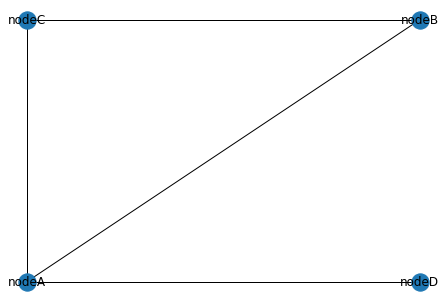

In [28]:
# 네트워크 가시화
import networkx as nx
import matplotlib.pyplot as plt

G = nx.Graph()

#노드 추가
G.add_node("nodeA")
G.add_node("nodeB")
G.add_node("nodeC")
G.add_node("nodeD")

#엣지 추가
G.add_edge("nodeA", "nodeB")
G.add_edge("nodeB", "nodeC")
G.add_edge("nodeA", "nodeC")
G.add_edge("nodeA", "nodeD")

#좌표 설정
pos={}
pos['nodeA'] = (0,0)
pos['nodeB'] = (1,1)
pos['nodeC'] = (0,1)
pos['nodeD'] = (1,0)

# 그리기
nx.draw(G, pos, with_labels=True)

# 표시
plt.show()

In [32]:
import numpy as np

#weight
df_w = pd.read_csv("./pyda100-master/6장/network_weight.csv")
df_w

,A,B,C,D,E
0,0.639921,0.143353,0.944669,0.521848,0.000000
1,0.264556,0.000000,0.456150,0.568434,0.000000
2,0.617635,0.612096,0.616934,0.943748,0.000000
3,0.000000,0.000000,0.697631,0.060225,0.666767
4,0.670638,0.210383,0.000000,0.315428,0.000000


In [33]:
#pos
df_p = pd.read_csv("./pyda100-master/6장/network_pos.csv")
df_p

,A,B,C,D,E
0,0,0,2,2,1
1,0,2,0,2,1


In [34]:
size=10
edge_weights=[]
for i in range(len(df_w)) :
    for j in range(len(df_w.columns)):
        edge_weights.append(df_w.iloc[i][j]*size)

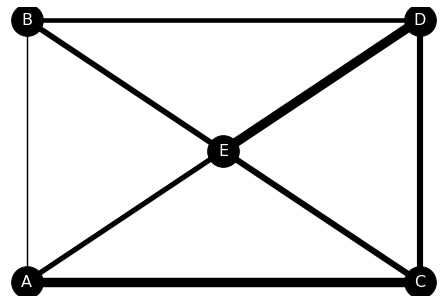

In [35]:
G = nx.Graph()

for i in range(len(df_w.columns)):
    G.add_node(df_w.columns[i])
    
for i in range(len(df_w.columns)):
    for j in range(len(df_w.columns)):
        G.add_edge(df_w.columns[i], df_w.columns[j])
        
pos = {}
for i in range(len(df_w.columns)):
    node = df_w.columns[i]
    pos[node] = (df_p[node][0], df_p[node][1])
    
nx.draw(G, pos, with_labels=True, font_size=16, node_size=1000, node_color='k', font_color='w', width=edge_weights)
plt.show()

In [36]:
# 창고에서 공장으로 운송한 양 
df_tr = pd.read_csv('./pyda100-master/6장/trans_route.csv', index_col="공장")
df_tr

,F1,F2,F3,F4
공장,,,,
W1,15,15,0,5
W2,5,0,30,5
W3,10,15,2,15


In [37]:
df_pos = pd.read_csv("./pyda100-master/6장/trans_route_pos.csv")
df_pos

,W1,W2,W3,F1,F2,F3,F4
0,0,0,0,4.0,4.0,4.0,4.0
1,1,2,3,0.5,1.5,2.5,3.5


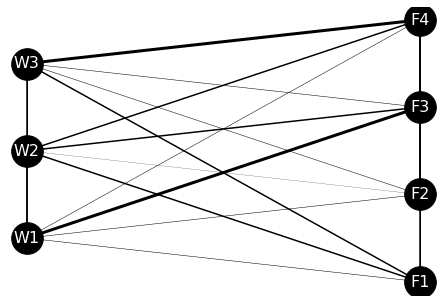

In [39]:
G = nx.Graph()

for i in range(len(df_pos.columns)):
    G.add_node(df_pos.columns[i])
    
num_pre = 0
edge_weights = []
size = 0.1

for i in range(len(df_pos.columns)):
    for j in range(len(df_pos.columns)):
        if not (i==j) :
            G.add_edge(df_pos.columns[i], df_pos.columns[j])
            if num_pre < len(G.edges):
                num_pre = len(G.edges)
                weight = 0
                if (df_pos.columns[i] in df_tr.columns) and (df_pos.columns[j] in df_tr.index):
                    if df_tr[df_pos.columns[i]][df_pos.columns[j]] :
                        weight = df_tr[df_pos.columns[i]][df_pos.columns[j]]*size
                elif (df_pos.columns[j] in df_tr.columns) and (df_pos.columns[i] in df_tr.index):
                    if df_tr[df_pos.columns[j]][df_pos.columns[i]] :
                        weight = df_tr[df_pos.columns[j]][df_pos.columns[i]]*size
                        edge_weights.append(weight)
                        
pos = {}
for i in range(len(df_pos.columns)):
    node = df_pos.columns[i]
    pos[node] = (df_pos[node][0], df_pos[node][1])
    
nx.draw(G, pos, with_labels = True, font_size=16, node_size=1000, node_color='k', font_color='w', width=edge_weights)
plt.show()

In [40]:
df_tr = pd.read_csv('./pyda100-master/6장/trans_route.csv', index_col="공장")
df_tr

,F1,F2,F3,F4
공장,,,,
W1,15,15,0,5
W2,5,0,30,5
W3,10,15,2,15


In [41]:
df_tc = pd.read_csv("./pyda100-master/6장/trans_cost.csv", index_col='공장')
df_tc

,F1,F2,F3,F4
공장,,,,
W1,10,10,11,27
W2,18,21,12,14
W3,15,12,14,12


In [42]:
# 운송 비용 함수
def trans_cost(df_tr, df_tc):
    cost=0
    for i in range(len(df_tc.index)):
        for j in range(len(df_tr.columns)):
            cost += df_tr.iloc[i][j] * df_tc.iloc[i][j]
    return cost

print("총 운송 비용 :", str(trans_cost(df_tr, df_tc)))

총 운송 비용 : 1493


In [45]:
df_tr

,F1,F2,F3,F4
공장,,,,
W1,15,15,0,5
W2,5,0,30,5
W3,10,15,2,15


In [43]:
# 제약조건1 최소 제품 제조량
df_demand = pd.read_csv("./pyda100-master/6장/demand.csv")
df_demand

,F1,F2,F3,F4
0,28,29,31,25


In [46]:
# 제약조건2 공급 가능 부품 수
df_supply = pd.read_csv("./pyda100-master/6장/supply.csv")
df_supply

,W1,W2,W3
0,35,41,42


In [51]:
for i in range(len(df_demand.columns)):
    temp_sum = sum(df_tr[df_demand.columns[i]])
    print(str(df_demand.columns[i]) + '으로 운송량:', str(temp_sum) + " (수요량:" + str(df_demand.iloc[0][i]) + ")")
    if temp_sum>= df_demand.iloc[0][i] :
        print("수요량을 만족시키고 있음.")
    else :
        print("수요량을 만족시키지 못하고 있음. 운송 경로 재계산 필요.")
        
for i in range(len(df_supply.columns)):
    temp_sum = sum(df_tr.loc[df_supply.columns[i]])
    print(str(df_supply.columns[i])+"부터의 운송량:" + str(temp_sum) + " (공급 한계:" + str(df_supply.iloc[0][i]) + ")")

    if temp_sum <= df_supply.iloc[0][i]:
        print("공급 한계 범위 내")
    else :
        print("공급 한계 초과. 운송 경로 재계산 필요.")

F1으로 운송량: 30 (수요량:28)
수요량을 만족시키고 있음.
F2으로 운송량: 30 (수요량:29)
수요량을 만족시키고 있음.
F3으로 운송량: 32 (수요량:31)
수요량을 만족시키고 있음.
F4으로 운송량: 25 (수요량:25)
수요량을 만족시키고 있음.
W1부터의 운송량:35 (공급 한계:35)
공급 한계 범위 내
W2부터의 운송량:40 (공급 한계:41)
공급 한계 범위 내
W3부터의 운송량:42 (공급 한계:42)
공급 한계 범위 내


In [53]:
df_tr_new = pd.read_csv('./pyda100-master/6장/trans_route_new.csv', index_col='공장')
df_tr_new

,F1,F2,F3,F4
공장,,,,
W1,15,15,0,0
W2,5,0,30,10
W3,10,15,2,15


In [55]:
print("총 운송 비용 -변경 후 : "+str(trans_cost(df_tr_new, df_tc))) #비용 줄음

총 운송 비용 -변경 후 : 1428


In [57]:
# 제약조건 만족하는지 검사
# 수요
def condition_demand(df_tr, df_demand):
    flag = np.zeros(len(df_demand.columns))
    for i in range(len(df_demand.columns)):
        temp_sum = sum(df_tr[df_demand.columns[i]])
        if (temp_sum >= df_demand.iloc[0][i]) :
            flag[i] = 1
    return flag

print("수요 조건 계산 결과 : " + str(condition_demand(df_tr_new, df_demand)) )

수요 조건 계산 결과 : [1. 1. 1. 1.]


In [58]:
# 공급
def condition_supply(df_tr, df_supply):
    flag = np.zeros(len(df_supply.columns))
    for i in range(len(df_supply.columns)):
        temp_sum = sum(df_tr.loc[df_supply.columns[i]])
        if temp_sum <= df_supply.iloc[0][i]:
            flag[i]=1
    return flag

print("공급 조건 계산 결과 : " + str(condition_supply(df_tr_new, df_supply)))

공급 조건 계산 결과 : [1. 0. 1.]
